In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

_30k_main_palette_dict = {
    "blue": "#202F66",
    "orange": "#FF7048",
    "purple": "#8B87EA",
    "pink": "#D869AB",
    "cyan": "#54C9B9",
    "yellow": "#F3D36E",
}

_30k_danger_safe_palette_dict = {
    "danger": "#FF4F72",
    "safe": "#58EDB9",
}

_30k_text_palette_dict = {
    "text_black": "#32363A",
    "text_lighter1": "#6F7273",
    "text_lighter2": "#8B8E8F",
    "bg_cream": "#FAF7F4"
}

_font_mono = "Inconsolata"
_font_serif = "Canela"
_font_sans = "Gill Sans Nova"

plt.style.use("./utils/minus_thirty_k.mplstyle")

_30k = list(_30k_main_palette_dict.values())
sns.set_palette(_30k)

import warnings

warnings.filterwarnings('ignore')

# Let's explore data and clean unwanted data

In [2]:
tw_df = pd.read_csv("./data/thailand_092020_tweets_csv_hashed.csv")
usr_df = pd.read_csv("./data/thailand_092020_users_csv_hashed.csv")

In [3]:
tw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21385 entries, 0 to 21384
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   tweetid                   21385 non-null  int64  
 1   userid                    21385 non-null  object 
 2   user_display_name         21385 non-null  object 
 3   user_screen_name          21385 non-null  object 
 4   user_reported_location    1406 non-null   object 
 5   user_profile_description  7801 non-null   object 
 6   user_profile_url          0 non-null      float64
 7   follower_count            21385 non-null  int64  
 8   following_count           21385 non-null  int64  
 9   account_creation_date     21385 non-null  object 
 10  account_language          21385 non-null  object 
 11  tweet_language            21385 non-null  object 
 12  tweet_text                21385 non-null  object 
 13  tweet_time                21385 non-null  object 
 14  tweet_

In [4]:
usr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 926 entries, 0 to 925
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   userid                    926 non-null    object 
 1   user_display_name         926 non-null    object 
 2   user_screen_name          926 non-null    object 
 3   user_reported_location    23 non-null     object 
 4   user_profile_description  245 non-null    object 
 5   user_profile_url          0 non-null      float64
 6   follower_count            926 non-null    int64  
 7   following_count           926 non-null    int64  
 8   account_creation_date     926 non-null    object 
 9   account_language          926 non-null    object 
dtypes: float64(1), int64(2), object(7)
memory usage: 72.5+ KB


In [5]:
tw_df['tweet_time'] = pd.to_datetime(tw_df['tweet_time'])
usr_df['account_creation_date'] = pd.to_datetime(usr_df['account_creation_date'])

# When did IO tweet?

In [6]:
tw_group_by_time = tw_df.groupby(by=[tw_df['tweet_time'].dt.date]).count()
usr_group_by_time = usr_df.groupby(by=[usr_df['account_creation_date']]).count()

<AxesSubplot:xlabel='tweet_time', ylabel='tweetid'>

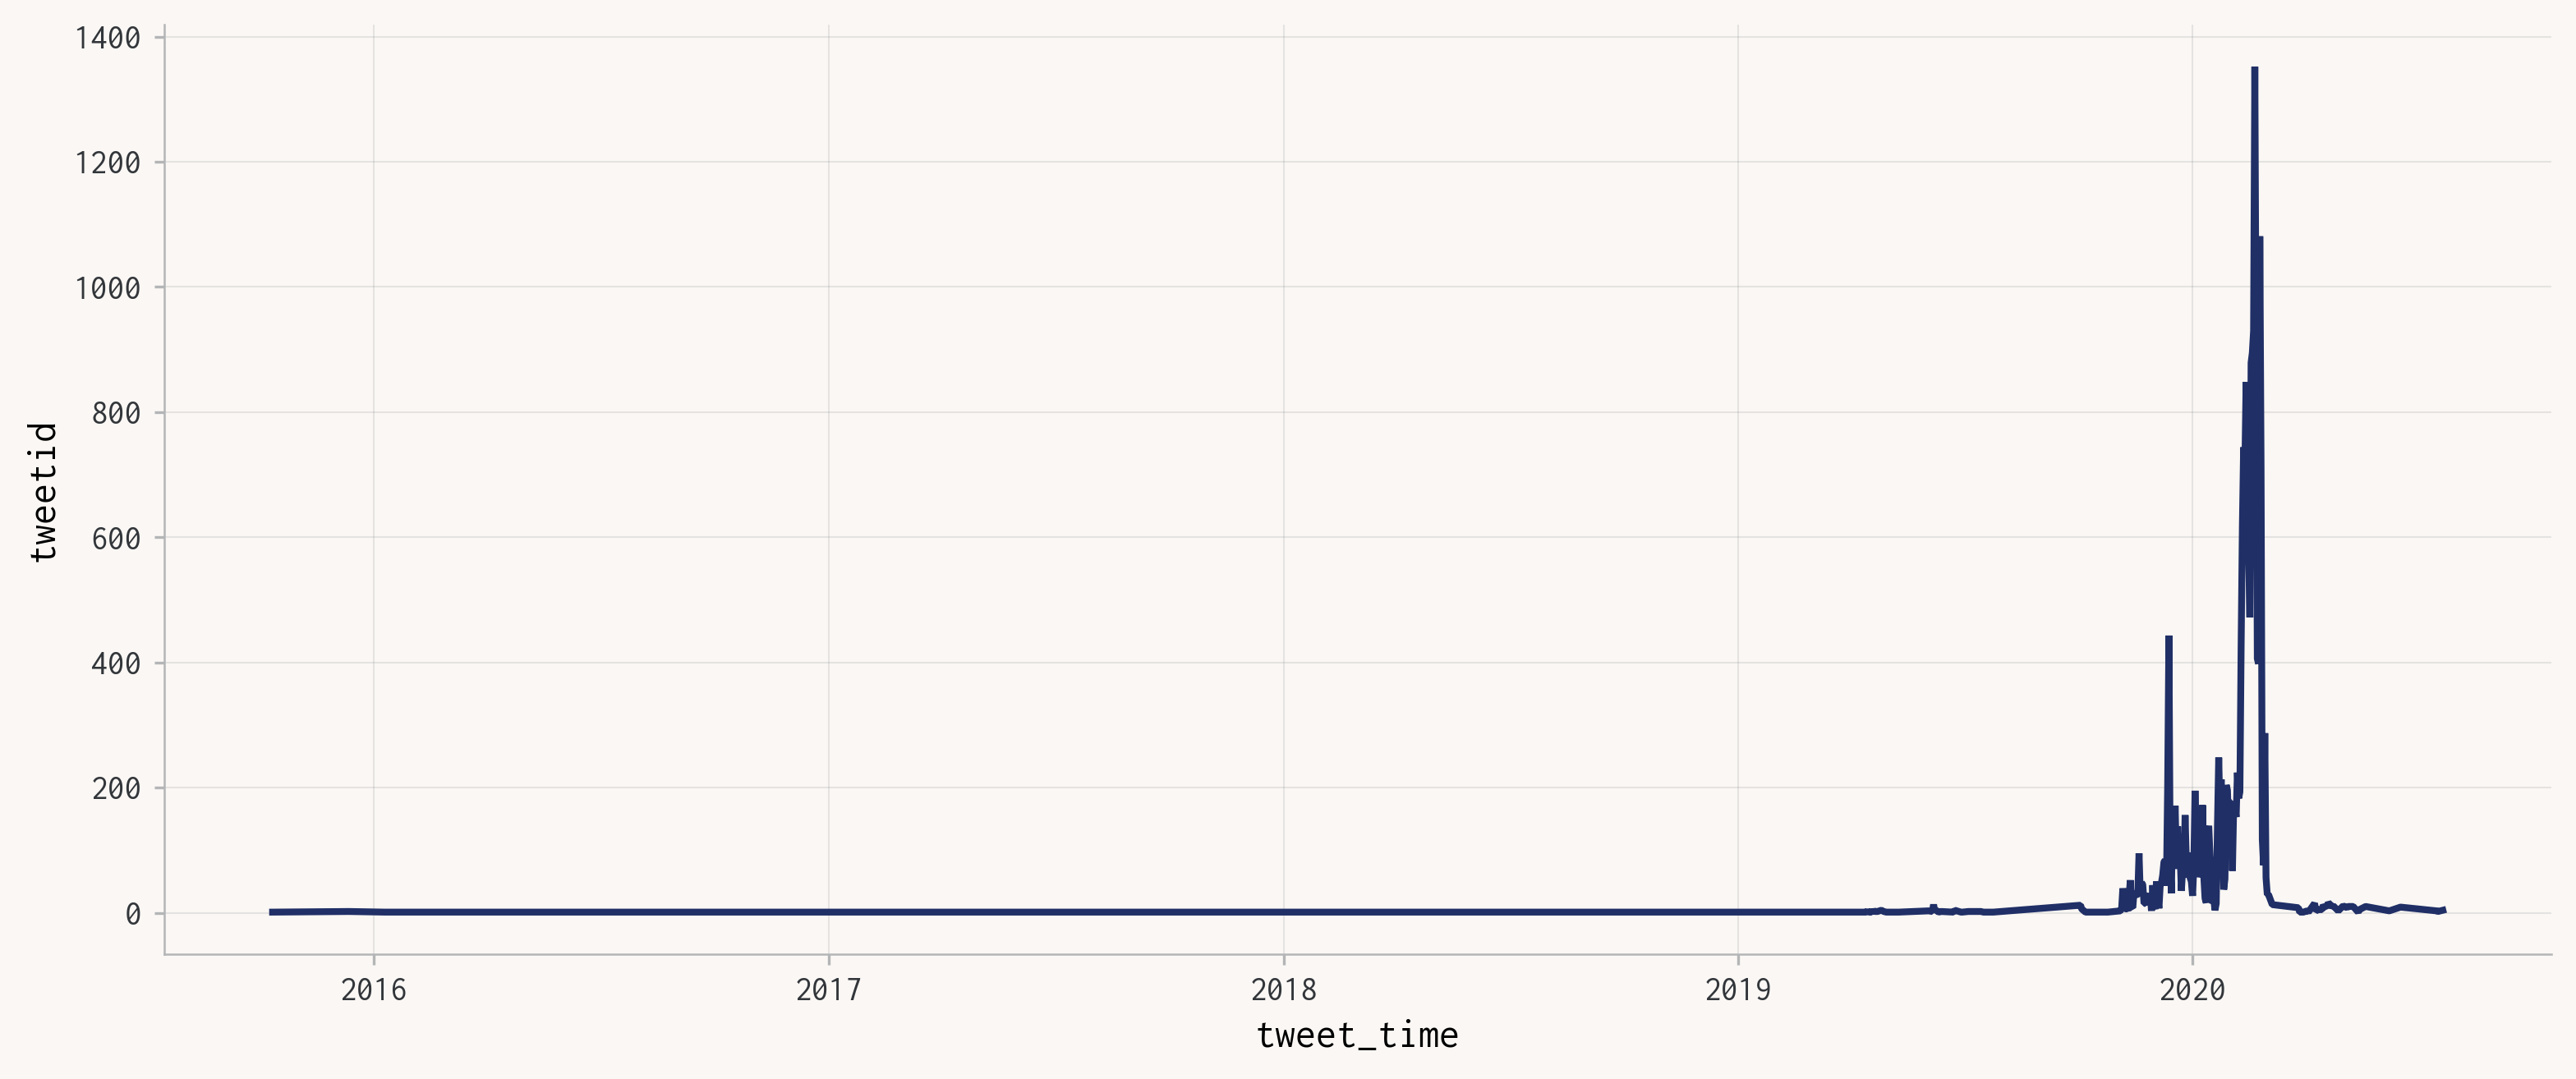

In [7]:
# fig = plt.figure(figsize=(7, 3), dpi=300)
sns.lineplot(tw_group_by_time.index, tw_group_by_time['tweetid'], 
             solid_capstyle='projecting', linewidth=2)

<AxesSubplot:xlabel='account_creation_date', ylabel='userid'>

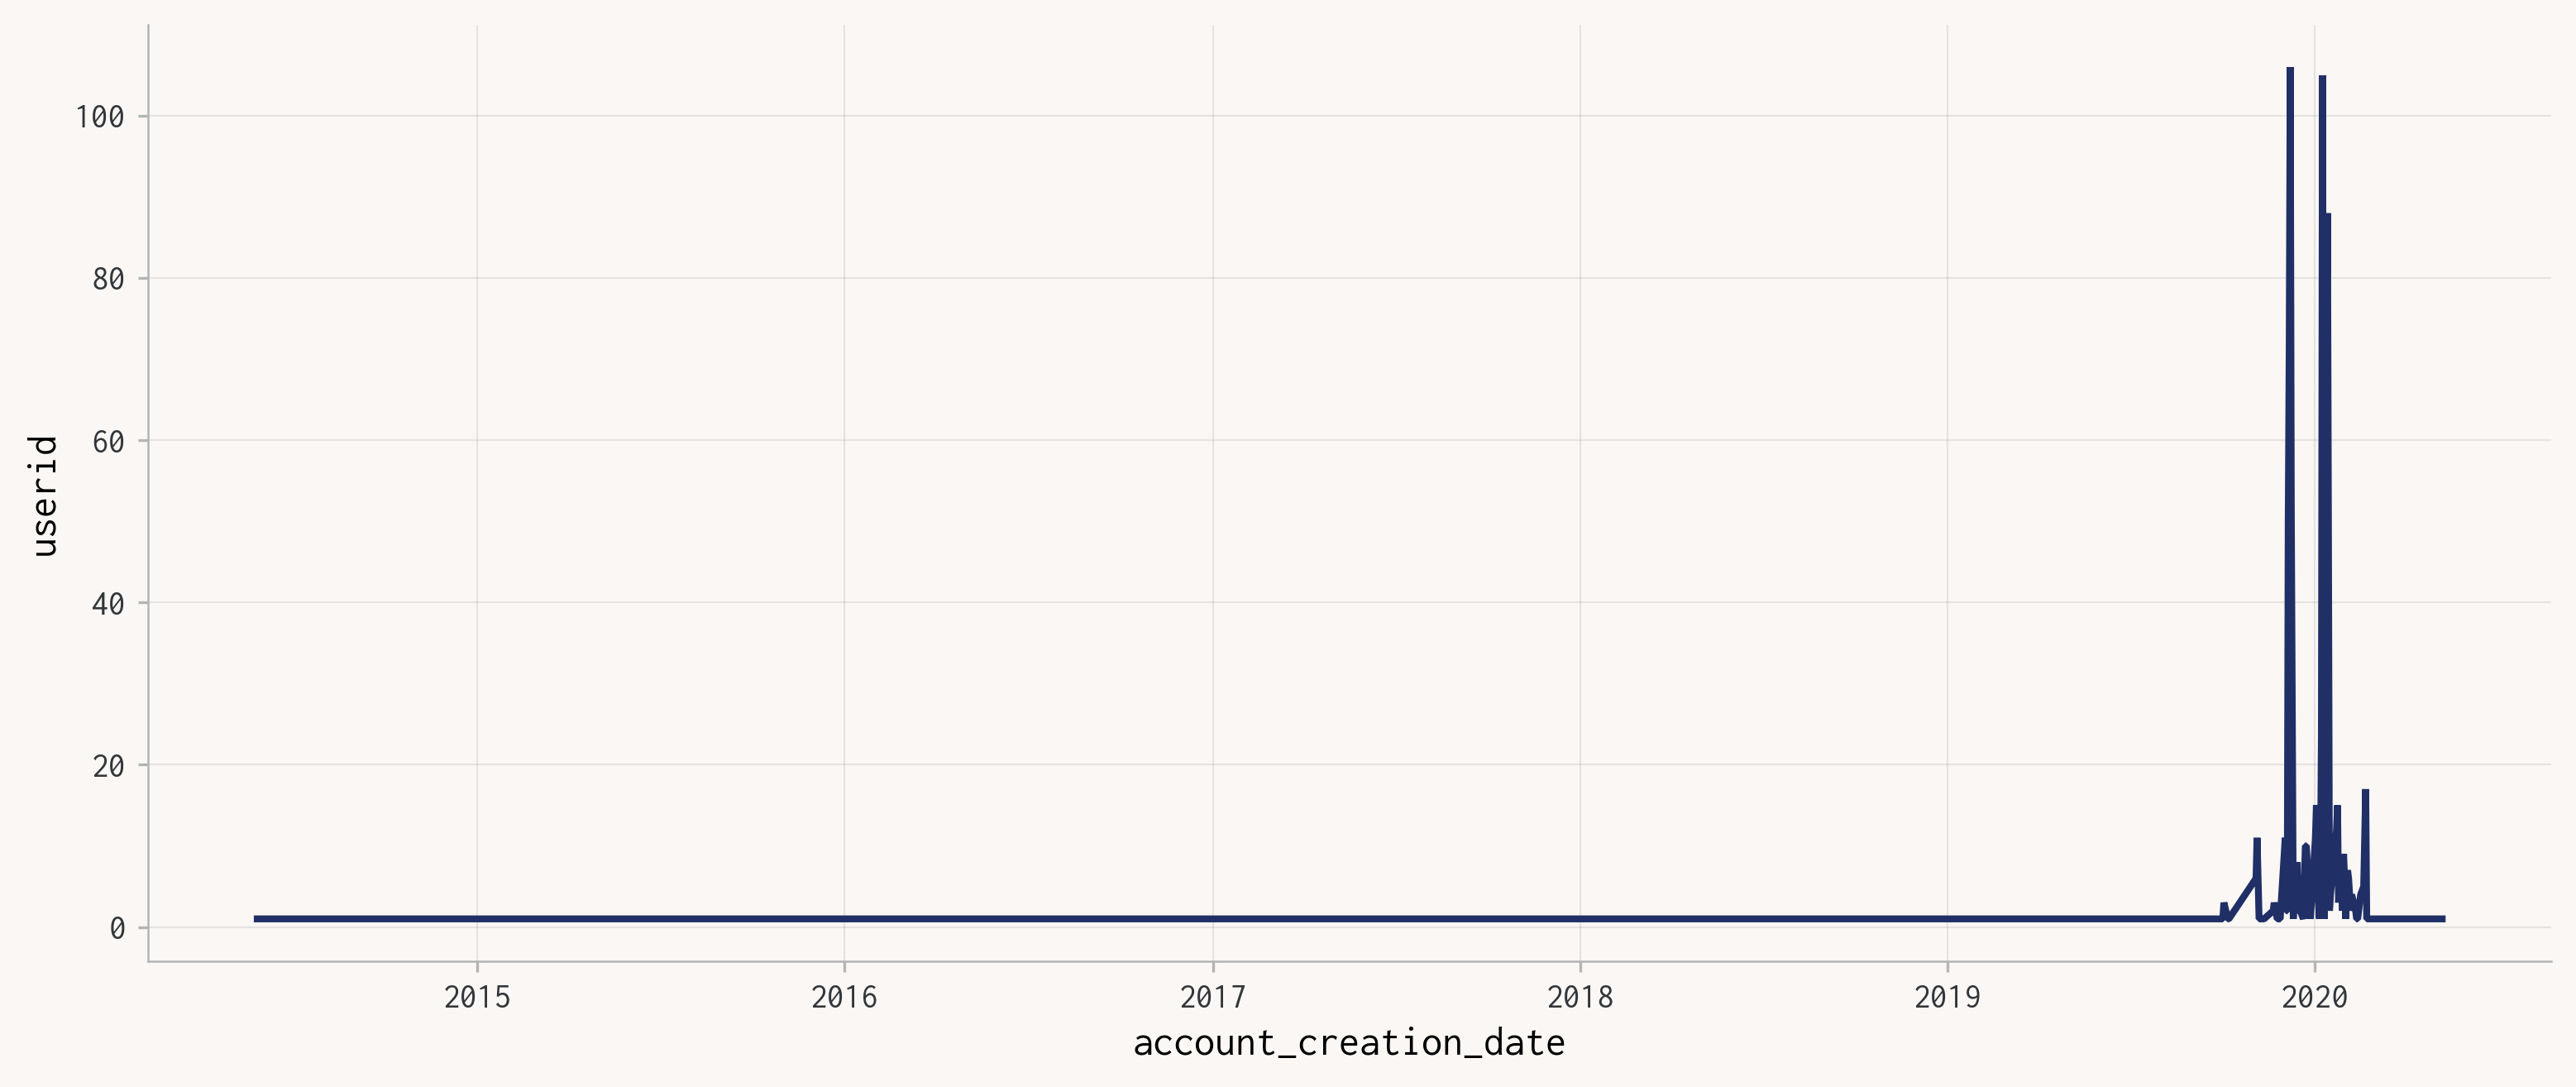

In [8]:
sns.lineplot(usr_group_by_time.index, usr_group_by_time['userid'], linewidth=2)

In [9]:
tw_df.groupby(tw_df["tweet_time"].dt.year).count()

,tweetid,userid,user_display_name,user_screen_name,user_reported_location,user_profile_description,user_profile_url,follower_count,following_count,account_creation_date,...,retweet_tweetid,latitude,longitude,quote_count,reply_count,like_count,retweet_count,hashtags,urls,user_mentions
tweet_time,,,,,,,,,,,,,,,,,,,,,
2015,3,3,3,3,3,3,0,3,3,3,...,0,3,3,3,3,3,3,3,3,3
2016,9,9,9,9,8,8,0,9,9,9,...,0,9,9,9,9,9,9,9,9,9
2017,1,1,1,1,1,1,0,1,1,1,...,0,1,1,1,1,1,1,1,1,1
2018,8,8,8,8,8,8,0,8,8,8,...,0,8,8,8,8,8,8,8,8,8
2019,3483,3483,3483,3483,334,1006,0,3483,3483,3483,...,1188,3483,3483,3483,3483,3483,3483,3483,3483,3483
2020,17881,17881,17881,17881,1052,6775,0,17881,17881,17881,...,10011,17881,17881,17881,17881,17881,17881,17881,17881,17881


# Most of IO activities were from late 2019 - 2020. We can filter only that range.

filter tweets those are tweeted in year >= 2019.

In [10]:
tw_filtered = tw_df[tw_df['tweet_time'] >= pd.to_datetime("2019-01-01")]

tw_filtered_users = tw_filtered['userid'].drop_duplicates()

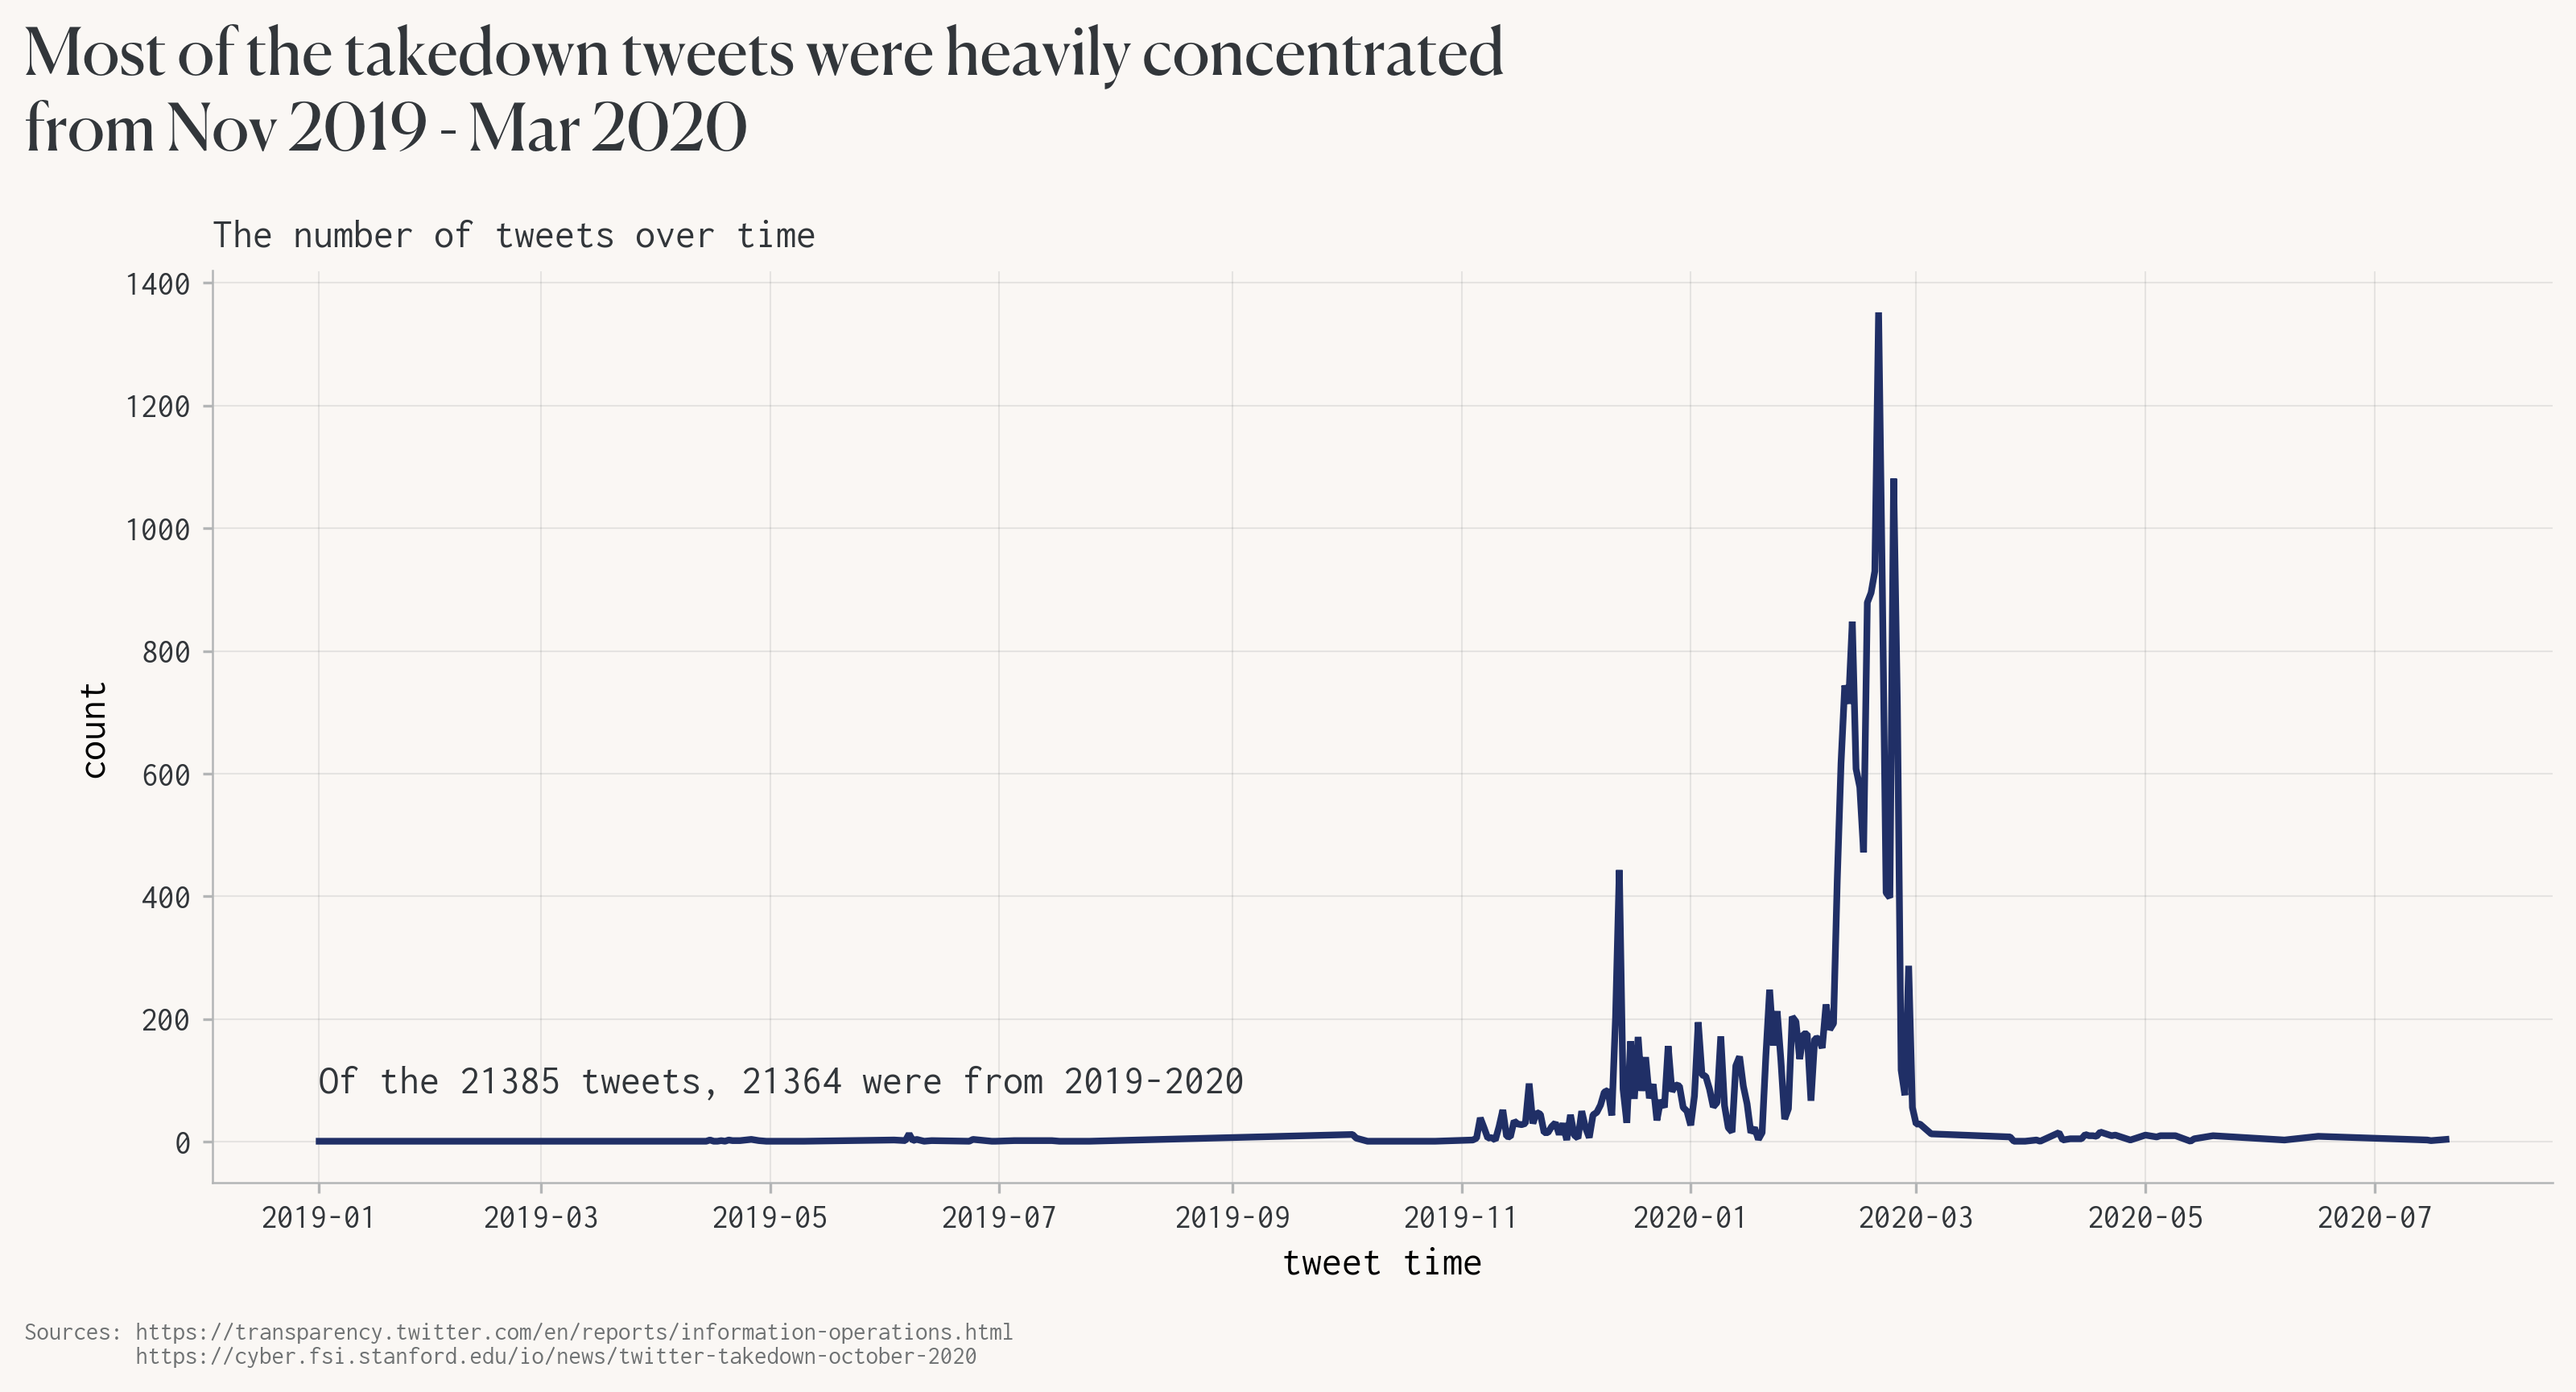

In [11]:
tw_filtered_group_by_time = tw_df.groupby(by=[tw_filtered['tweet_time'].dt.date]).count()

base_fontsize = 12


fig = plt.figure()
sns.lineplot(tw_filtered_group_by_time.index, tw_filtered_group_by_time['tweetid'], linewidth=2)

plt.title("The number of tweets over time")

ax = plt.gca()

fig.suptitle("Most of the takedown tweets were heavily concentrated \nfrom Nov 2019 - Mar 2020", 
             x=ax.get_position().x0/2, y=ax.get_position().y1*1.1, 
             ha='left', va='bottom', fontfamily=_font_serif)

plt.xlabel('tweet time')
plt.ylabel('count')

annot_text = """\
Of the 21385 tweets, 21364 were from 2019-2020"""

plt.figtext(x=ax.get_position().x0+0.035, y=ax.get_position().y0+0.075, 
            s=annot_text,
            color=_30k_text_palette_dict['text_black'], fontsize=base_fontsize,
            ha='left'
           )

source_text = """\
Sources: https://transparency.twitter.com/en/reports/information-operations.html
         https://cyber.fsi.stanford.edu/io/news/twitter-takedown-october-2020"""
plt.figtext(x=ax.get_position().x0/2, y=ax.get_position().y0-0.15, 
            s=source_text,
            color=_30k_text_palette_dict['text_lighter1'], fontsize=base_fontsize/1.618,
            ha='left'
           )
plt.show()

In [12]:
usr_filtered = usr_df[usr_df['userid'].isin(tw_filtered_users)]

In [13]:
tw_filtered.to_csv("./data/tweets_2019-2020.csv", index=False)

In [14]:
usr_filtered.to_csv("./data/users_2019-2020.csv", index=False)